### A. Import Python Modules and Dataset


In [137]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("~/data_mining/loans_train_prepared.csv")
df.tail()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,month_nan,poutcome_other,poutcome_success,poutcome_nan,subscribed_yes,subscribed_nan,default_yes,housing_yes,loan_yes,TotalContacts
1995,1995,0.20,0.002786,16,0.390558,2,0.590991,0,0,0,...,0,0,0,1,1,0,0,0,0,0.290179
1996,1996,0.28,0.001409,16,4.712446,2,0.590991,0,0,0,...,0,0,0,1,1,0,0,0,0,0.290179
1997,1997,0.81,0.002052,17,-0.021459,1,0.590991,0,0,0,...,0,0,0,1,1,0,0,0,0,0.003328
1998,1998,0.46,0.003306,20,-0.218884,1,0.590991,0,0,0,...,0,0,0,1,1,0,0,1,0,0.003328
1999,1999,0.40,0.003840,22,-0.120172,2,0.590991,0,0,1,...,0,0,0,1,1,0,0,0,0,0.290179


### B. Rescale the Data


In [138]:
data = np.array(df.values, dtype=float)
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

### C. Scatterplot Function (to be used below for visualising a clustering)


In [139]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

## Task 3

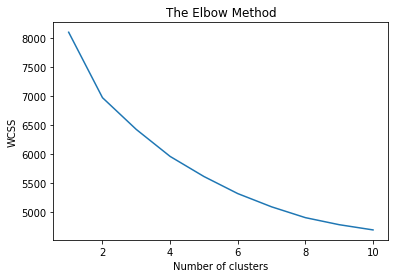

In [160]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


#### Choosing 6 as the k value as curve becomes linear from then on

### D. K-Means Clustering

In [140]:
k = 6

In [141]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

In [142]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

In [143]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


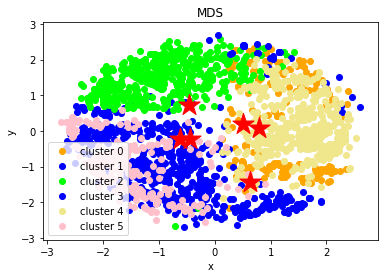

In [144]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

In [145]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


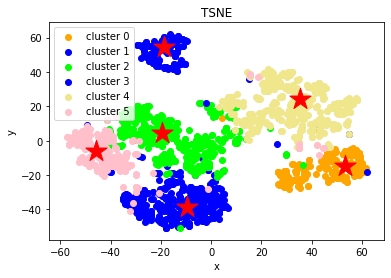

In [146]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

In [147]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [148]:
df.head()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,poutcome_other,poutcome_success,poutcome_nan,subscribed_yes,subscribed_nan,default_yes,housing_yes,loan_yes,TotalContacts,cluster
0,0,0.32,0.001595,1,3.094421,2,0.939612,2,0,0,...,0,0,0,0,0,0,1,0,0.694812,4
1,1,0.39,0.001784,1,-0.012876,2,0.944061,1,0,0,...,0,0,0,0,0,0,1,1,0.512824,4
2,2,0.59,0.001987,1,-0.472103,2,1.155386,1,0,0,...,0,0,0,0,0,0,1,1,0.512824,4
3,3,0.47,0.001599,1,0.163090,1,1.153588,2,1,0,...,0,0,0,0,0,0,1,1,0.512824,4
4,4,0.54,0.001970,1,1.042918,1,1.270678,1,0,0,...,0,0,0,0,0,0,1,0,0.290179,4


In [149]:
df.tail()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,poutcome_other,poutcome_success,poutcome_nan,subscribed_yes,subscribed_nan,default_yes,housing_yes,loan_yes,TotalContacts,cluster
1995,1995,0.20,0.002786,16,0.390558,2,0.590991,0,0,0,...,0,0,1,1,0,0,0,0,0.290179,5
1996,1996,0.28,0.001409,16,4.712446,2,0.590991,0,0,0,...,0,0,1,1,0,0,0,0,0.290179,5
1997,1997,0.81,0.002052,17,-0.021459,1,0.590991,0,0,0,...,0,0,1,1,0,0,0,0,0.003328,1
1998,1998,0.46,0.003306,20,-0.218884,1,0.590991,0,0,0,...,0,0,1,1,0,0,1,0,0.003328,3
1999,1999,0.40,0.003840,22,-0.120172,2,0.590991,0,0,1,...,0,0,1,1,0,0,0,0,0.290179,1


In [150]:
df.groupby('cluster').mean()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,month_nan,poutcome_other,poutcome_success,poutcome_nan,subscribed_yes,subscribed_nan,default_yes,housing_yes,loan_yes,TotalContacts
cluster,,,,,,,,,,,,,,,,,,,,,
0,625.892857,0.411825,0.001776,28.773810,-0.132945,1.642857,1.129955,3.285714,0.194444,0.039683,...,0.0,0.007937,0.000000,0.000000,0.000000,0.0,0.015873,0.753968,0.297619,0.723203
1,1486.554707,0.542366,0.002230,15.096692,0.677424,1.783715,0.960520,3.043257,0.111959,0.015267,...,0.0,0.081425,0.506361,0.221374,0.984733,0.0,0.000000,0.190840,0.055980,0.711513
2,1353.134658,0.382274,0.002153,14.938190,0.413031,2.015453,0.944068,2.761589,0.011038,0.017660,...,0.0,0.130243,0.379691,0.245033,0.854305,0.0,0.004415,0.249448,0.052980,0.706789
3,891.823529,0.384176,0.001619,8.141176,-0.061777,1.600000,0.591624,0.011765,0.341176,0.029412,...,0.0,0.000000,0.000000,0.988235,0.011765,0.0,0.023529,0.882353,0.105882,0.158129
4,297.963783,0.414487,0.001800,5.772636,-0.129748,2.205231,1.131061,2.651911,0.223340,0.028169,...,0.0,0.034205,0.006036,0.000000,0.000000,0.0,0.008048,0.786720,0.209256,0.739172
5,1465.493617,0.311489,0.002077,14.889362,0.578815,1.800000,0.908002,2.246809,0.131915,0.008511,...,0.0,0.157447,0.297872,0.374468,0.953191,0.0,0.004255,0.187234,0.029787,0.574068


## Task 4

## MeanShift clustering

In [171]:
clustered_data_sklearn = cluster.MeanShift(bandwidth=2).fit(data)

In [169]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

In [170]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1995 but corresponding boolean dimension is 2000

In [158]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [159]:
df.groupby('cluster').mean()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,month_nan,poutcome_other,poutcome_success,poutcome_nan,subscribed_yes,subscribed_nan,default_yes,housing_yes,loan_yes,TotalContacts
cluster,,,,,,,,,,,,,,,,,,,,,
0,999.5,0.417305,0.001979,13.8515,0.240431,1.9095,0.982995,2.5615,0.149,0.0225,...,0.0,0.0735,0.222,0.227,0.5,0.0,0.0075,0.4815,0.125,0.655602
